<a href="https://colab.research.google.com/github/pratikagithub/All-About-Data-Analyst/blob/main/Stock_Market_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock market anomaly detection refers to the process of identifying unusual patterns or behaviours in stock market data that deviate significantly from the expected norm. The key is that these events are unexpected and can lead to significant price movements or unusual trading volumes.

Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.

Below is the process we can follow for the task of stock market anomaly detection:

Gather historical stock market data, including prices (open, high, low, close, adjusted close) and trading volumes.

Develop additional features that may help in detecting anomalies, such as moving averages, relative strength index (RSI), or percentage changes over specific periods.

Visualize the data to identify potential outliers or unusual patterns across time.

Employ statistical methods like Z-score analysis, where data points that are a certain number of standard deviations away from the mean are flagged as anomalies.

Use the insights gained from anomaly detection to inform investment decisions, risk management, and strategic planning.

Before getting started with Stock Market Anomaly Detection, I’ll collect real-time stock market data of several companies. I’ll use the yfinance API for this task. If you haven’t used it before, you can install it on your Python virtual environment by using the command mentioned below on your terminal or the command prompt:

pip install yfinance

Below is how we can collect real-time stock market data using Python:

In [5]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from google.colab import files

uploaded = files.upload()


Saving stock_market.csv to stock_market (4).csv


In [6]:
data = pd.read_csv('stock_market.csv')
print(data.head())
print(data.columns)

   Unnamed: 0        Date Ticker   Adj Close       Close        High  \
0           0  2023-04-06   AAPL  163.785767  164.660004  164.960007   
1           1  2023-04-06   GOOG  108.900002  108.900002  109.629997   
2           2  2023-04-06   MSFT  289.226227  291.600006  292.079987   
3           3  2023-04-06   NFLX  339.329987  339.329987  340.480011   
4           4  2023-04-06   TSLA  185.059998  185.059998  186.389999   

          Low        Open       Volume  
0  162.000000  162.429993   45390100.0  
1  104.815002  105.769997   34684200.0  
2  282.029999  283.209991   29770300.0  
3  332.630005  339.339996    4660500.0  
4  179.740005  183.080002  123857900.0  
Index(['Unnamed: 0', 'Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low',
       'Open', 'Volume'],
      dtype='object')


In [7]:
# Read the uploaded file (assuming it's in CSV format)
stock_data = pd.read_csv(next(iter(uploaded.keys())))

# Check the structure of the DataFrame
print(stock_data.head())

# Define the columns to melt
id_vars = ['Date', 'Ticker']
value_vars = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = stock_data.melt(id_vars=id_vars, value_vars=value_vars, var_name='Attribute', value_name='Value')

# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

# Reset index to turn multi-index into columns
data_pivoted.reset_index(inplace=True)

# Display the processed DataFrame
print(data_pivoted.head())

   Unnamed: 0        Date Ticker   Adj Close       Close        High  \
0           0  2023-04-06   AAPL  163.785767  164.660004  164.960007   
1           1  2023-04-06   GOOG  108.900002  108.900002  109.629997   
2           2  2023-04-06   MSFT  289.226227  291.600006  292.079987   
3           3  2023-04-06   NFLX  339.329987  339.329987  340.480011   
4           4  2023-04-06   TSLA  185.059998  185.059998  186.389999   

          Low        Open       Volume  
0  162.000000  162.429993   45390100.0  
1  104.815002  105.769997   34684200.0  
2  282.029999  283.209991   29770300.0  
3  332.630005  339.339996    4660500.0  
4  179.740005  183.080002  123857900.0  
Attribute        Date Ticker   Adj Close       Close        High         Low  \
0          2023-04-06   AAPL  163.785767  164.660004  164.960007  162.000000   
1          2023-04-06   GOOG  108.900002  108.900002  109.629997  104.815002   
2          2023-04-06   MSFT  289.226227  291.600006  292.079987  282.029999   
3

The data we collected contains the following columns:

Date: The date of the stock data entry.

Ticker: The stock ticker symbol.

Adj Close: The adjusted closing price of the stock, which accounts for any corporate actions like splits or dividends.

Close: The closing price of the stock.

High: The highest price of the stock during the trading day.

Low: The lowest price of the stock during the trading day.

Open: The opening price of the stock.

Volume: The number of shares traded during the day.

Now, let’s make some necessary transformations in the dataset before moving forward

In [8]:
# convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# set the 'Date' column as the index of the dataframe
stock_data.set_index('Date', inplace=True)
print(stock_data.head())

            Unnamed: 0 Ticker   Adj Close       Close        High         Low  \
Date                                                                            
2023-04-06           0   AAPL  163.785767  164.660004  164.960007  162.000000   
2023-04-06           1   GOOG  108.900002  108.900002  109.629997  104.815002   
2023-04-06           2   MSFT  289.226227  291.600006  292.079987  282.029999   
2023-04-06           3   NFLX  339.329987  339.329987  340.480011  332.630005   
2023-04-06           4   TSLA  185.059998  185.059998  186.389999  179.740005   

                  Open       Volume  
Date                                 
2023-04-06  162.429993   45390100.0  
2023-04-06  105.769997   34684200.0  
2023-04-06  283.209991   29770300.0  
2023-04-06  339.339996    4660500.0  
2023-04-06  183.080002  123857900.0  


**Stock Market Anomaly Detection using Python**

Now, let’s get started with the task of stock market anomaly detection with a visualization of the adjusted close prices and volumes for each ticker over time to get an overview of the data:

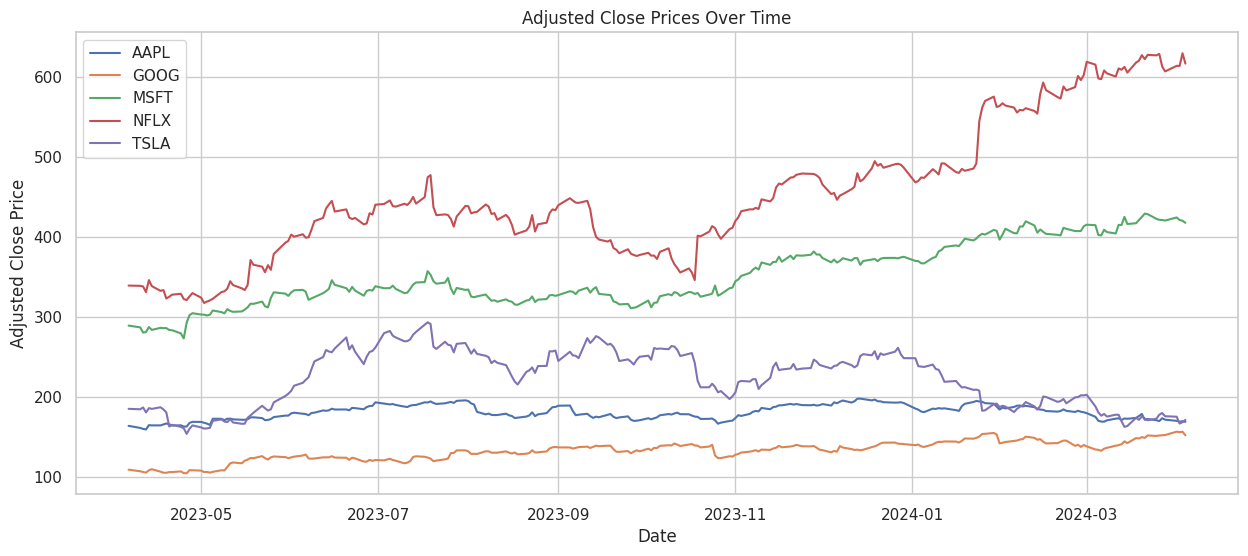

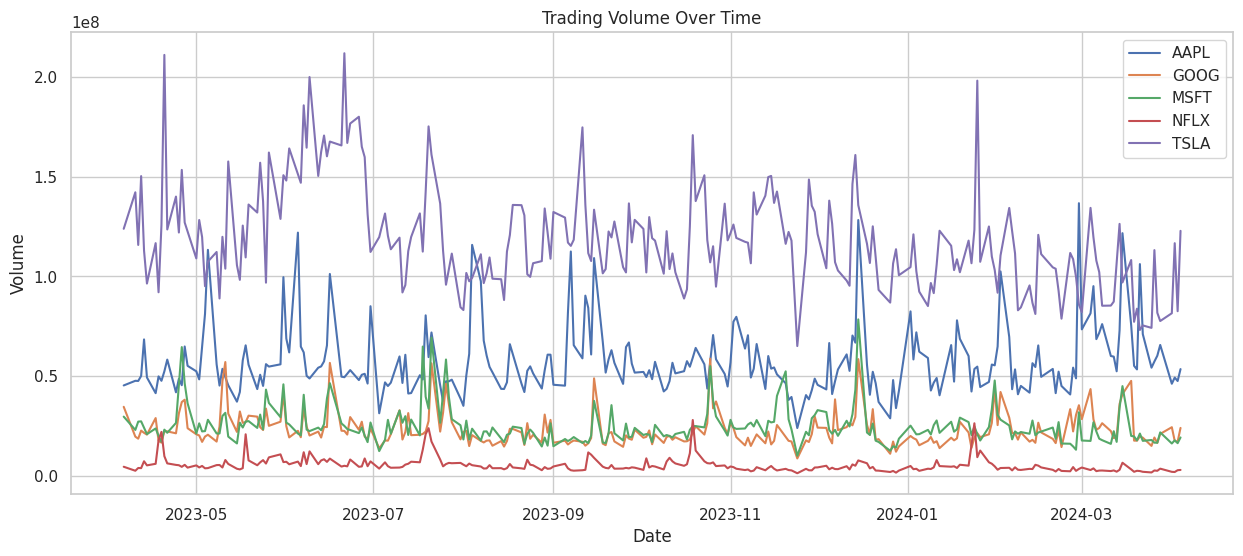

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plotting the adjusted close prices for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Adj Close'], label=ticker)

plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# plotting the trading volume for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Volume'], label=ticker)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

The first graph shows the adjusted closing prices of five different stocks:

AAPL (Apple Inc.)

GOOG (Alphabet Inc.)

MSFT (Microsoft Corporation)

NFLX (Netflix, Inc.)

and TSLA (Tesla, Inc.)

GOOG appears to have the highest price and shows a general uptrend throughout the period, despite some volatility. TSLA and AAPL also exhibit an uptrend, with AAPL’s stock price increasing more steadily. MSFT and NFLX display relatively lower prices compared to the others, with NFLX showing considerable fluctuation but remaining mostly flat, and MSFT demonstrating a slight downtrend towards the end of the period.

From the second graph, it is evident that AAPL and TSLA have the highest and most volatile trading volumes, with TSLA showing particularly large spikes. It suggests significant investor interest or reactions to events during those times. GOOG, while having the highest stock price, shows moderate and relatively stable trading volume. MSFT and NFLX have lower and less volatile trading volumes in comparison to AAPL and TSLA. The spikes and dips in trading volumes could correspond to earnings reports, product announcements, or other market-moving events for these companies.

**Detecting Anomalies in the Stock Market**

Given the variability and trends observed in both adjusted close prices and trading volumes, anomaly detection can focus on identifying:


Significant price movements that deviate from the stock’s typical price range or trend.

Unusual trading volumes that stand out from the normal trading activity.

For the task of stock market anomaly detection, we can use the Z-score method, which identifies anomalies based on how many standard deviations away a data point is from the mean. A common threshold for identifying an anomaly is a Z-score greater than 2 or less than -2, which corresponds to data points that are more than 2 standard deviations away from the mean.

We will compute the Z-scores for both the adjusted close prices and trading volumes for each stock and then identify any data points that exceed this threshold:

In [10]:
from scipy.stats import zscore

def detect_anomalies(df, column):
    df_copy = df.copy()

    # calculate Z-scores and add them as a new column
    df_copy['Z-score'] = zscore(df_copy[column])

    # find where the absolute Z-score is greater than 2 (common threshold for anomalies)
    anomalies = df_copy[abs(df_copy['Z-score']) > 2]
    return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data['Ticker'].unique():
    data_ticker = stock_data[stock_data['Ticker'] == ticker]

    adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
    volume_anomalies = detect_anomalies(data_ticker, 'Volume')

    # use concat instead of append
    anomalies_adj_close = pd.concat([anomalies_adj_close, adj_close_anomalies])
    anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])

print(anomalies_adj_close.head())

            Unnamed: 0 Ticker   Adj Close       Close        High         Low  \
Date                                                                            
2023-04-10           5   AAPL  161.169724  162.029999  162.029999  160.080002   
2023-04-11          10   AAPL  159.946259  160.800003  162.360001  160.509995   
2023-04-12          15   AAPL  159.249985  160.100006  162.059998  159.779999   
2023-04-10           6   GOOG  106.949997  106.949997  107.970001  105.599998   
2023-04-11          11   GOOG  106.120003  106.120003  107.220001  105.279999   

                  Open      Volume   Z-score  
Date                                          
2023-04-10  161.419998  47716900.0 -2.129871  
2023-04-11  162.350006  47644200.0 -2.263950  
2023-04-12  161.220001  50133100.0 -2.340255  
2023-04-10  107.389999  19741500.0 -2.087372  
2023-04-11  106.919998  18721300.0 -2.156236  


In [11]:
print(anomalies_volume.head())

            Unnamed: 0 Ticker   Adj Close       Close        High         Low  \
Date                                                                            
2023-05-05         100   AAPL  172.648453  173.570007  174.300003  170.759995   
2023-05-31         185   AAPL  176.552795  177.250000  179.350006  176.759995   
2023-06-05         200   AAPL  178.873611  179.580002  184.949997  178.039993   
2023-06-16         245   AAPL  184.192612  184.919998  186.990005  184.270004   
2023-08-04         410   AAPL  181.274155  181.990005  187.380005  181.919998   

                  Open       Volume   Z-score  
Date                                           
2023-05-05  170.979996  113316400.0  3.244547  
2023-05-31  177.330002   99625300.0  2.449737  
2023-06-05  182.630005  121946500.0  3.745551  
2023-06-16  186.729996  101235600.0  2.543220  
2023-08-04  185.520004  115799700.0  3.388710  


Now, let’s plot the adjusted close prices and trading volumes again for each company, highlighting the anomalies we detected:

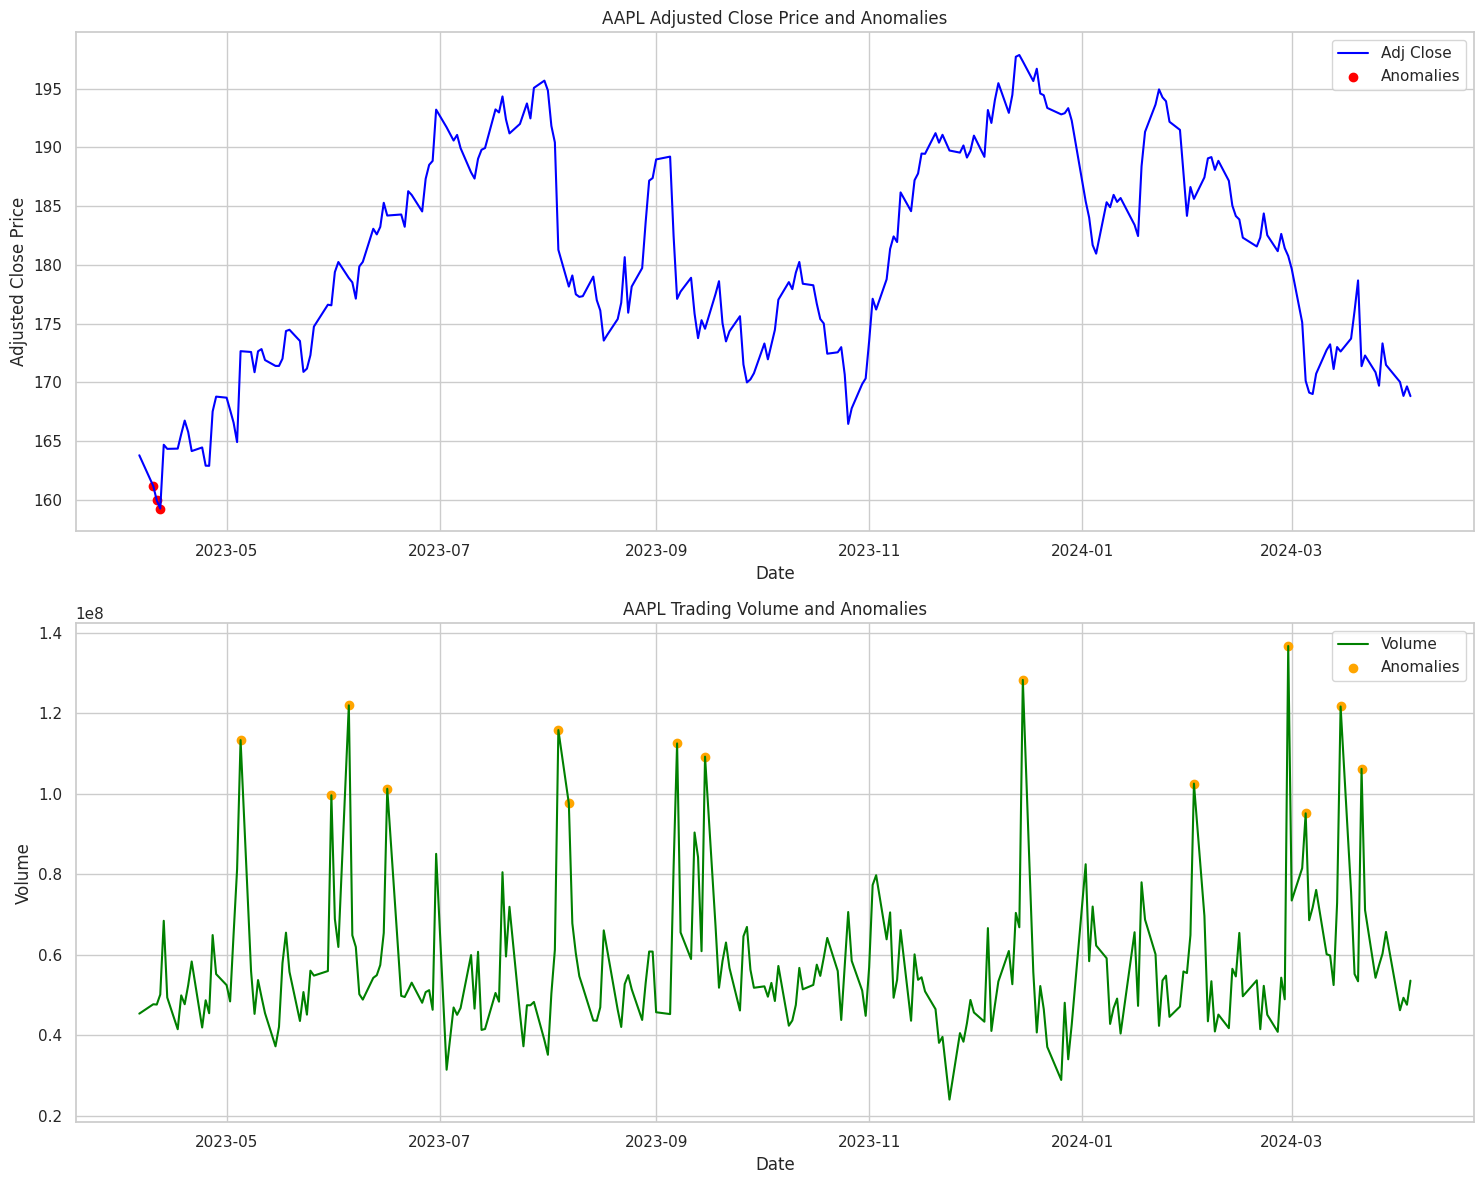

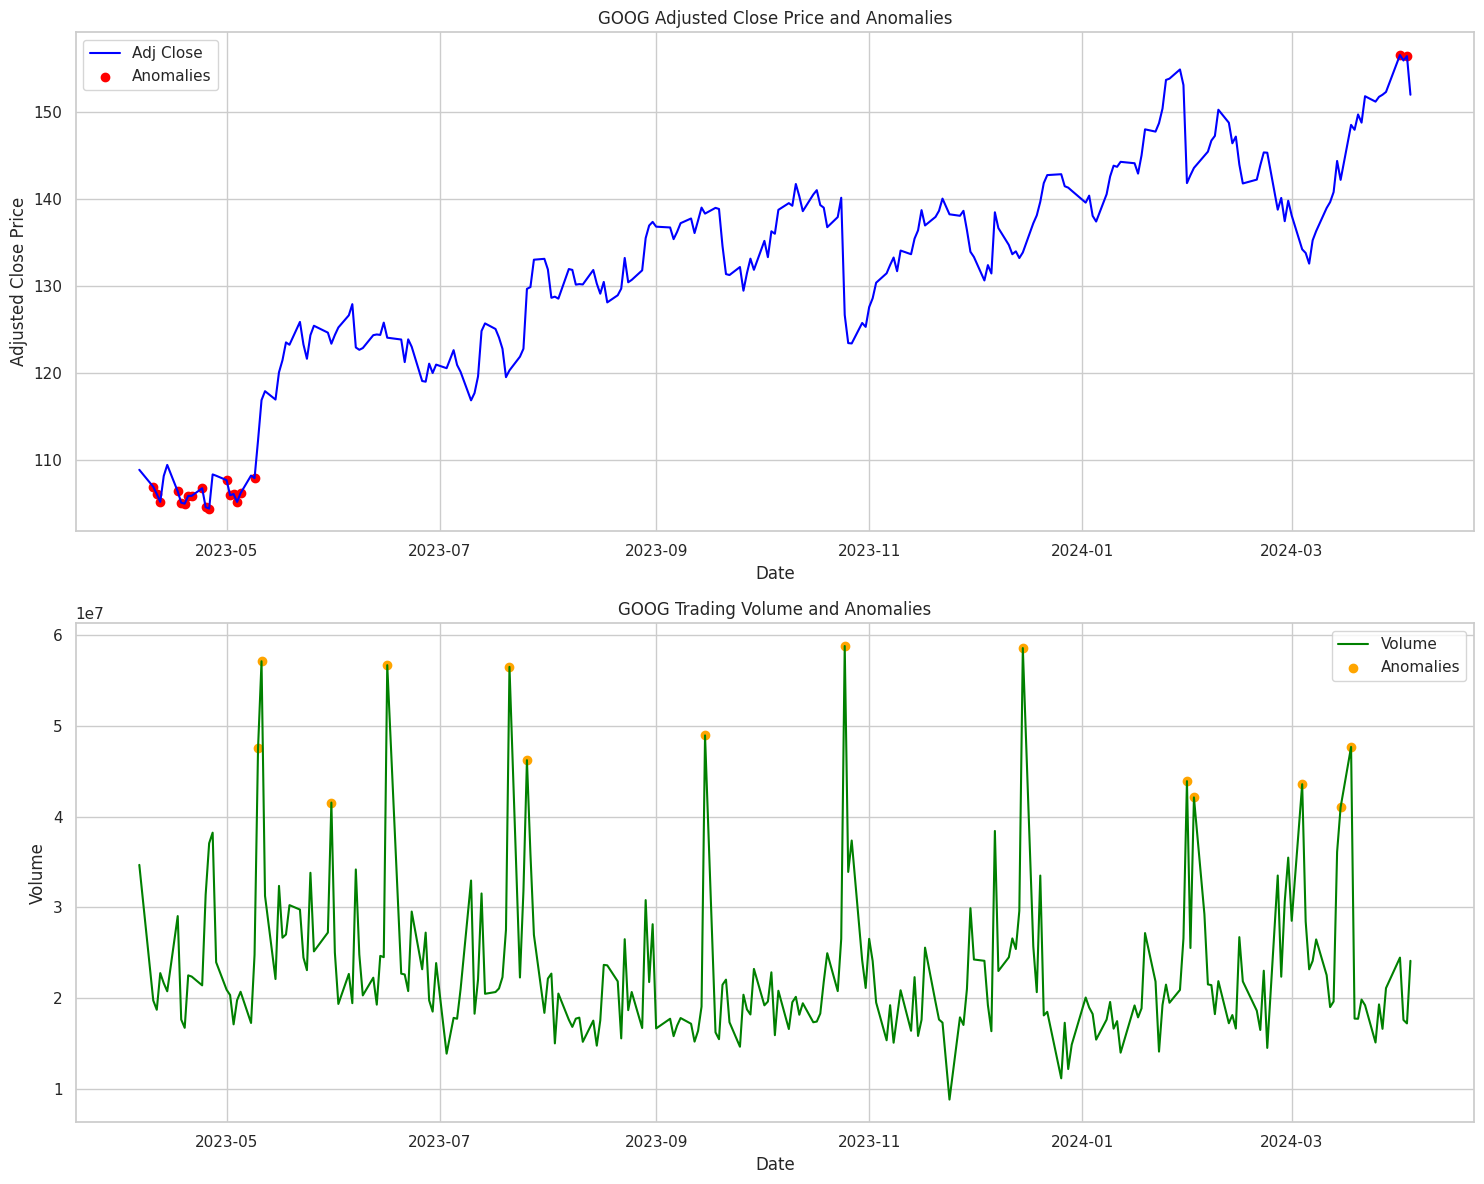

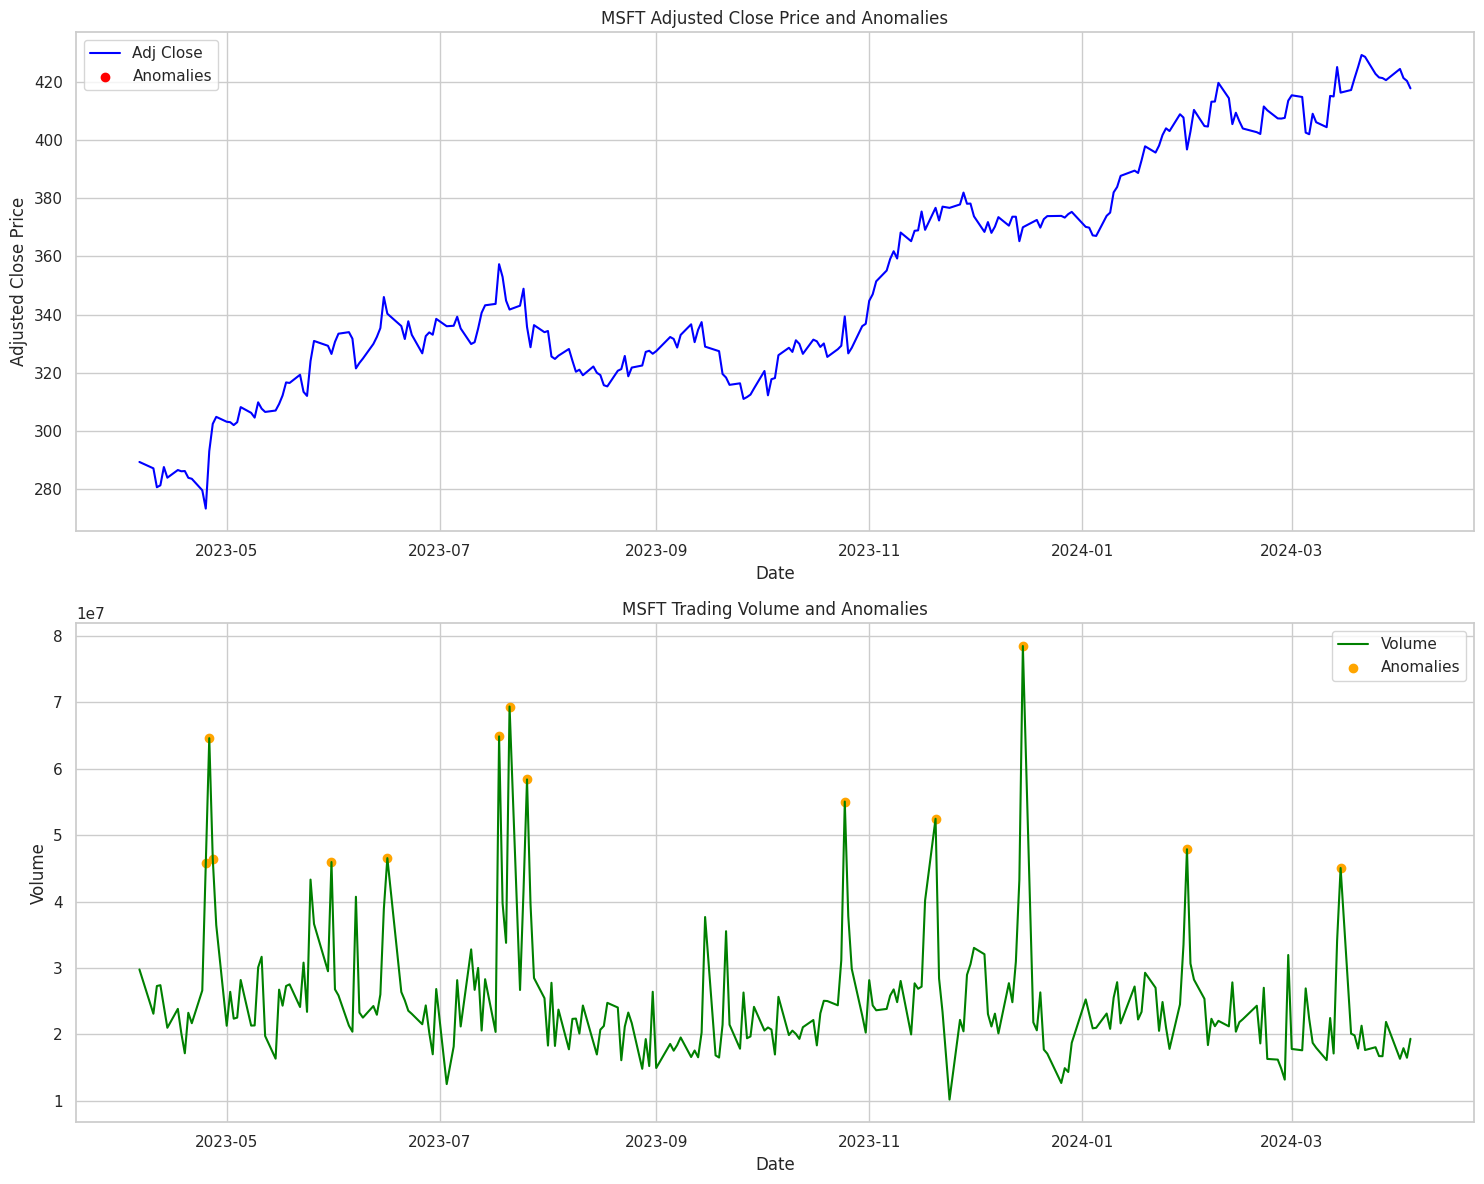

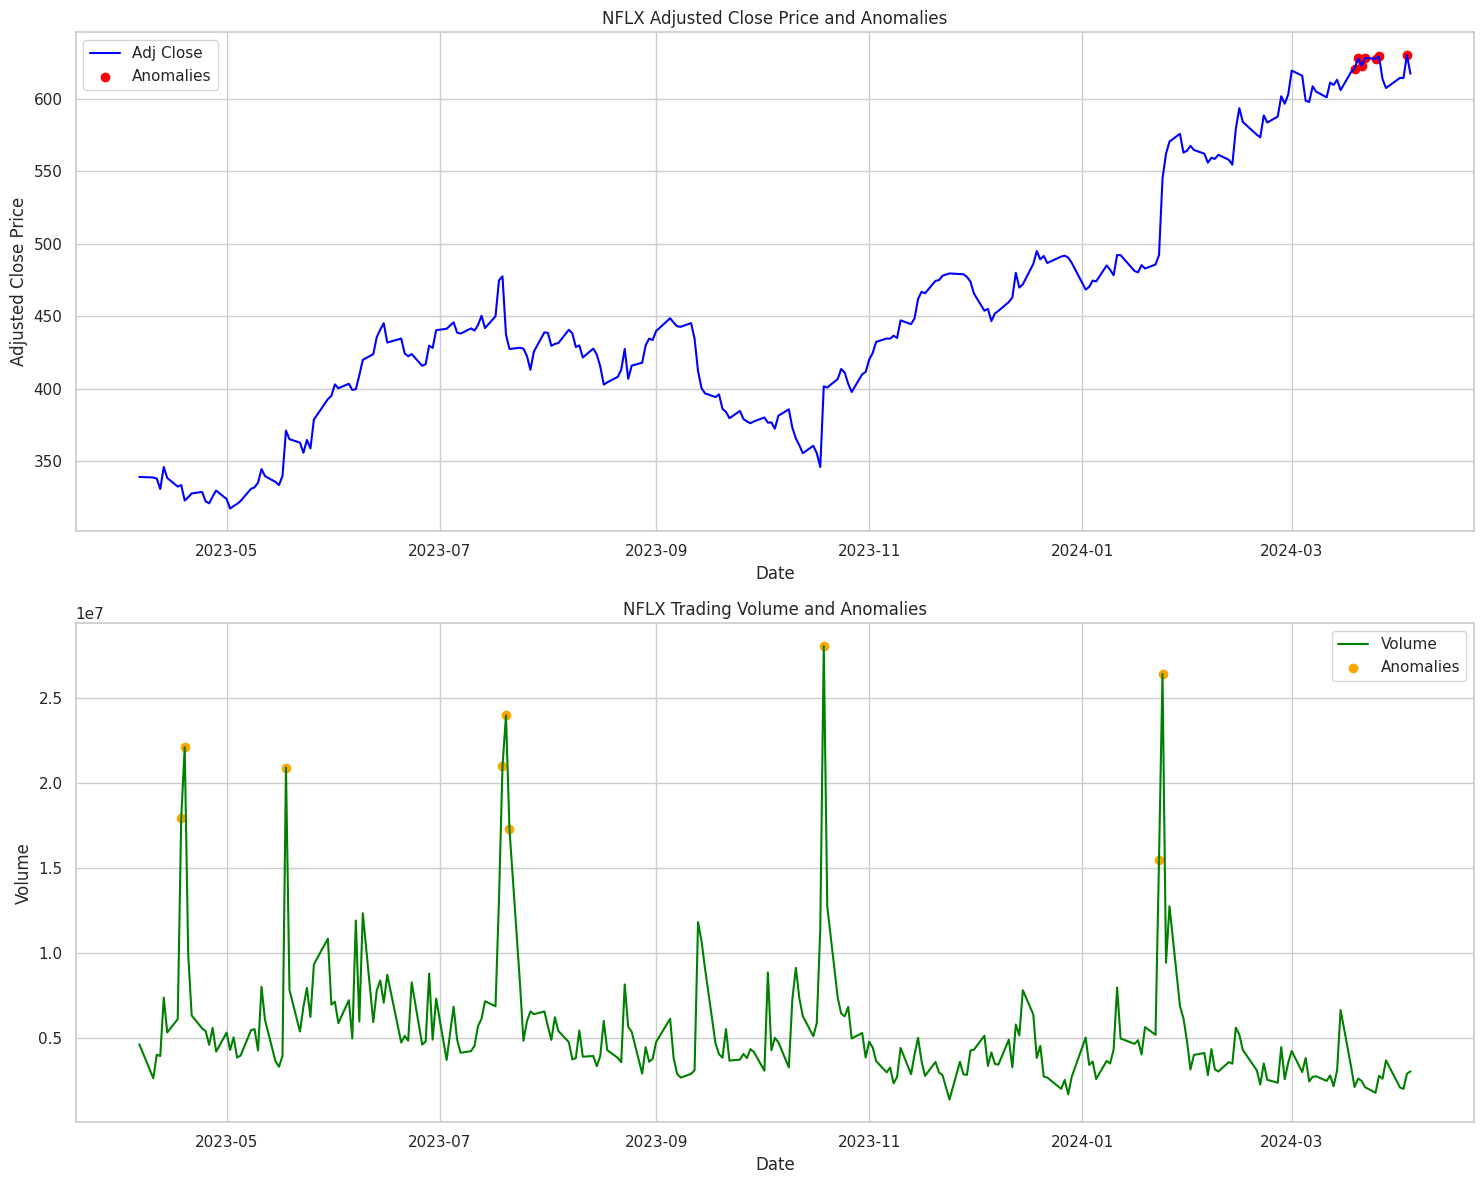

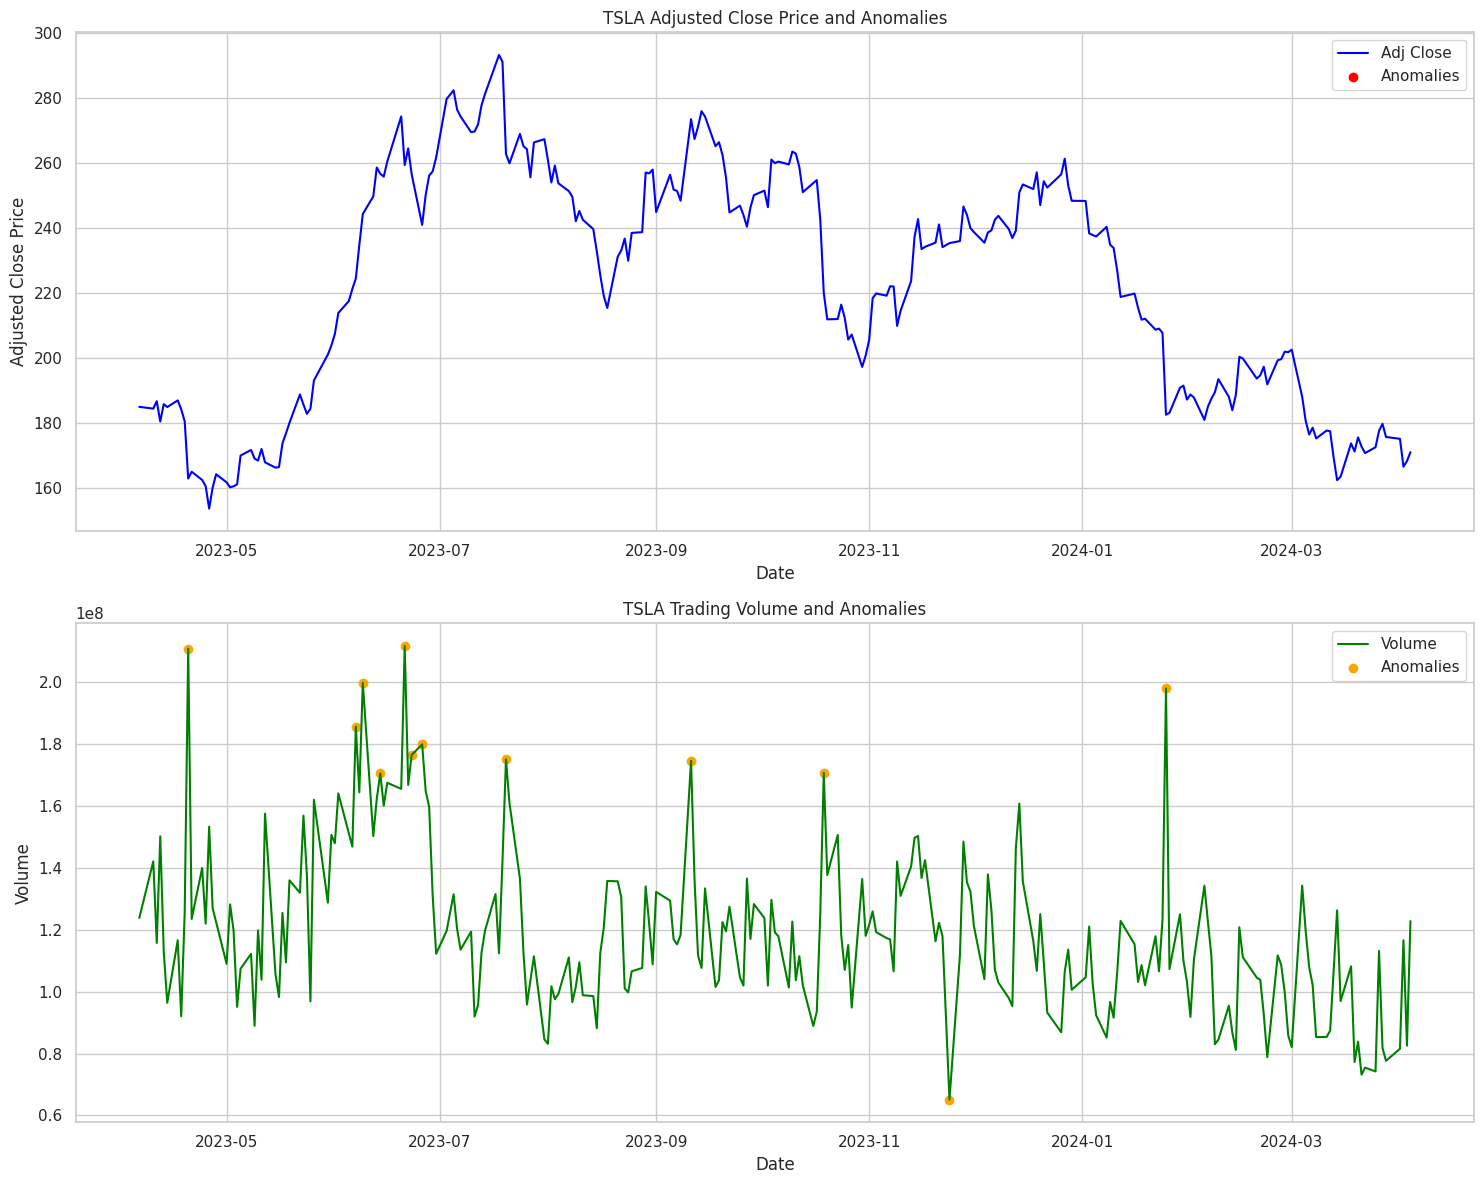

In [12]:
def plot_anomalies(ticker, anomalies_adj_close, anomalies_volume):
    # Filter the main and anomalies data for the given ticker
    data_ticker = stock_data[stock_data['Ticker'] == ticker]
    adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
    volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]

    # plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # adjusted close price
    ax1.plot(data_ticker.index, data_ticker['Adj Close'], label='Adj Close', color='blue')
    ax1.scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'], color='red', label='Anomalies')
    ax1.set_title(f'{ticker} Adjusted Close Price and Anomalies')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price')
    ax1.legend()

    # volume
    ax2.plot(data_ticker.index, data_ticker['Volume'], label='Volume', color='green')
    ax2.scatter(volume_anomalies.index, volume_anomalies['Volume'], color='orange', label='Anomalies')
    ax2.set_title(f'{ticker} Trading Volume and Anomalies')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# plot anomalies for each ticker
for ticker in stock_data['Ticker'].unique():
    plot_anomalies(ticker, anomalies_adj_close, anomalies_volume)

The above charts for each company display the adjusted close prices and trading volumes over time, with anomalies highlighted:

Anomalies are marked in red and represent significant deviations from the typical price range. These could correspond to days with unexpected news, earnings reports, or market shifts.

Anomalies in trading volume are marked in orange and indicate days with exceptionally high or low trading activity compared to the norm. Such spikes could be due to market events, announcements, or other factors influencing trader behaviour.

Now, let’s analyze the correlation in the anomalies of all the companies:

In [13]:
# consolidate anomalies for adjusted close prices and volumes
all_anomalies_adj_close = anomalies_adj_close[['Ticker']].copy()
all_anomalies_adj_close['Adj Close Anomaly'] = 1  # indicator variable for anomalies

all_anomalies_volume = anomalies_volume[['Ticker']].copy()
all_anomalies_volume['Volume Anomaly'] = 1  # indicator variable for anomalies

# pivot these dataframes to have one row per date and columns for each ticker, filling non-anomalies with 0
adj_close_pivot = all_anomalies_adj_close.pivot_table(index=all_anomalies_adj_close.index, columns='Ticker',
                                                       fill_value=0, aggfunc='sum')

volume_pivot = all_anomalies_volume.pivot_table(index=all_anomalies_volume.index, columns='Ticker',
                                                fill_value=0, aggfunc='sum')

# flatten the multi-level column index
adj_close_pivot.columns = adj_close_pivot.columns.get_level_values(1)
volume_pivot.columns = volume_pivot.columns.get_level_values(1)

# combine the two pivoted dataframes
combined_anomalies = pd.concat([adj_close_pivot, volume_pivot], axis=1, keys=['Adj Close Anomaly', 'Volume Anomaly'])

# calculate the correlation matrix for the anomalies
correlation_matrix = combined_anomalies.corr()

print(correlation_matrix)

                         Adj Close Anomaly                     Volume Anomaly  \
Ticker                                AAPL      GOOG      NFLX           AAPL   
                  Ticker                                                        
Adj Close Anomaly AAPL            1.000000  0.207514 -0.230283            NaN   
                  GOOG            0.207514  1.000000 -0.901127      -0.645497   
                  NFLX           -0.230283 -0.901127  1.000000       0.645497   
Volume Anomaly    AAPL                 NaN -0.645497  0.645497       1.000000   
                  GOOG                 NaN       NaN       NaN       0.170507   
                  MSFT                 NaN  0.258199 -0.258199      -0.004707   
                  NFLX                 NaN  0.258199 -0.258199      -0.336011   
                  TSLA                 NaN  0.166667 -0.166667      -0.405244   

                                                                  
Ticker                        GOOG      M

AAPL has a low positive correlation with GOOG and a negative correlation with NFLX in terms of adjusted close price anomalies. It suggests that price movements in AAPL have some level of simultaneous occurrence with GOOG but move inversely with NFLX. On the other hand, GOOG and NFLX show a strong negative correlation, indicating that when one experiences an anomalous price increase (or decrease), the other tends to move in the opposite direction.


In trading volumes, GOOG shows a positive correlation with MSFT in trading volume anomalies, suggesting that these companies might have simultaneous unusual trading activities. AAPL’s volume anomalies have a negative correlation with other companies like NFLX and TSLA, indicating that when AAPL experiences unusual trading volume, these companies tend to have opposite anomalies in their trading volumes.

**Analyzing the Risk of Anomalies**

Now, let’s rate each stock based on the risk inferred from the anomalies detected. For this task, we can consider the frequency and magnitude of these anomalies. A stock could be considered more risky if it has frequent and large anomalies in its price or volume. Here’s how we can approach this:

Frequency of Anomalies: A higher number of anomalies may indicate a higher risk.

Magnitude of Anomalies: Larger deviations from the mean (higher absolute Z-scores) suggest higher risk.

We can compute a risk score for each stock by combining these factors. For simplicity, we could average the absolute Z-scores of anomalies for each stock and then normalize these scores across all stocks to get a risk rating:

In [14]:
# calculate the mean absolute Z-score for each stock as a risk indicator
adj_close_risk = anomalies_adj_close.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())
volume_risk = anomalies_volume.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())

# combine the risk scores from both price and volume anomalies
total_risk = adj_close_risk + volume_risk

# normalize the risk scores to get a relative risk rating from 0 to 1
risk_rating = (total_risk - total_risk.min()) / (total_risk.max() - total_risk.min())

print(risk_rating)

Ticker
AAPL    0.134555
GOOG    0.000000
MSFT         NaN
NFLX    1.000000
TSLA         NaN
Name: Z-score, dtype: float64


Here’s the interpretation of each rating:

AAPL: Has a risk rating of approximately 0.17. It suggests that Apple’s stock shows some level of risk due to anomalies, but it is relatively moderate compared to others like NFLX.

GOOG: With a risk rating of around 0.06, GOOG appears to be less risky compared to AAPL. It indicates fewer or less significant anomalies in its trading data.

MSFT: Shows a risk rating of 0.00, indicating the least risk among the stocks listed. It suggests that Microsoft had the fewest and smallest anomalies in its price and volume data.

NFLX: Has the highest risk rating at 1.00. It indicates that Netflix is the most risky among these stocks, with the most frequent and largest anomalies detected.

TSLA: The NaN value suggests that it did not have detectable anomalies in the period analyzed.